## Import

### Import Functions

In [1]:
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf

import time
import datetime

filename_low_64 = "PS2-a-lowT/PS2-a-lowT/"
filename_high_64 = "PS2-a-highT/PS2-a-highT/"

filename_low_32 = "PS2-b-lowT/PS2-b-lowT/"
filename_high_32 = "PS2-b-highT/PS2-b-highT/"

# from google.colab import drive
# drive.mount('/content/drive')

### Import  64x64 Data

In [2]:
#Import the relevent images into python
high_t_64 = []
for i in range(500):
    high_t_64.append(np.loadtxt((filename_high_64+'/')+str(i).zfill(3), delimiter=','))

In [3]:
#Import the relevent images into python
low_t_64 = []
for i in range(500):
    low_t_64.append(np.loadtxt((filename_low_64+'/')+str(i).zfill(3), delimiter=','))

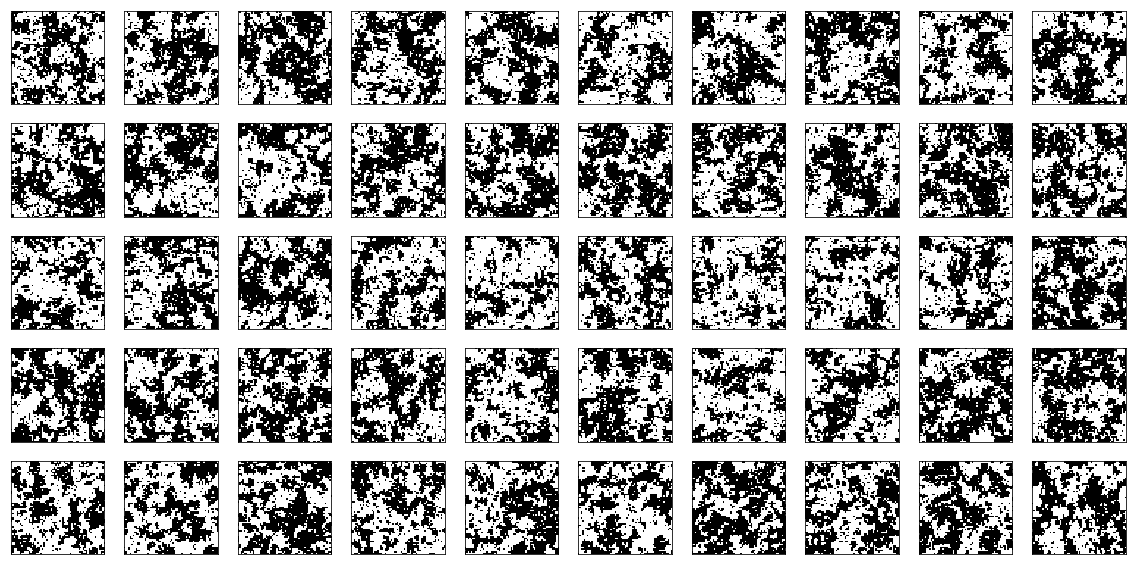

In [4]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

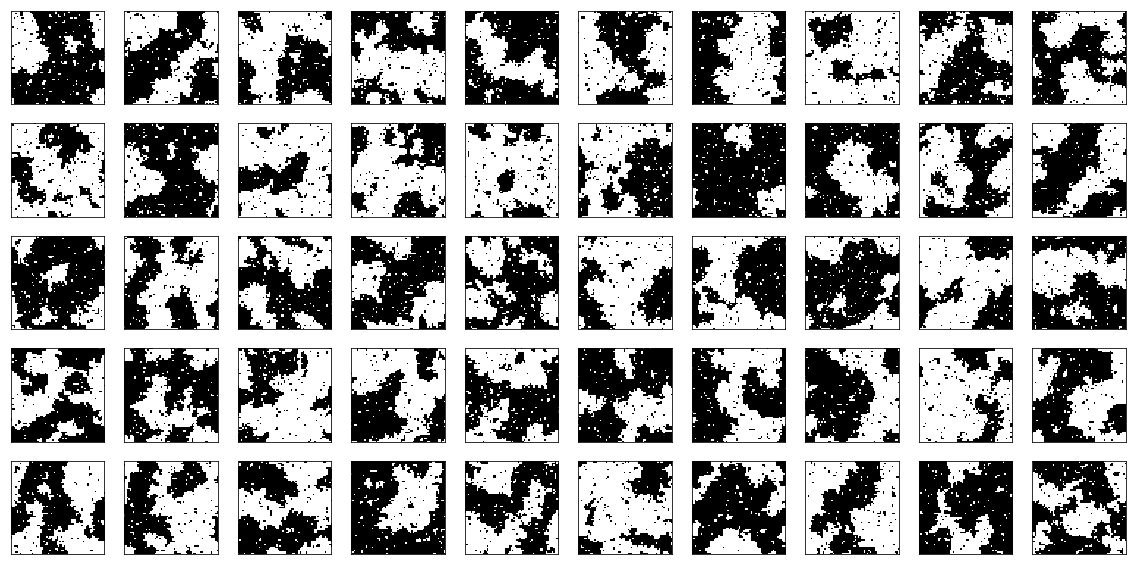

In [5]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [6]:
#Combine the two data-sets into a single array
data_img_64 = np.concatenate((high_t_64,low_t_64))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_64 = data_img_64.reshape((-1, 64*64))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_64 = np.concatenate((np.ones(len(high_t_64)), np.zeros(len(low_t_64))))

#Randomize the data and labels in the same manner, so that I can easily create train and test sets
data_img_64, data_label_64 = shuffle(data_img_64, data_label_64, random_state = 0)

### Import 32x32 Data

In [54]:
#Import the relevent images into python
high_t_32 = []
for i in range(500):
    high_t_32.append(np.loadtxt((filename_high_32+'/')+str(i).zfill(3), delimiter=','))

In [55]:
#Import the relevent images into python
low_t_32 = []
for i in range(500):
    low_t_32.append(np.loadtxt((filename_low_32+'/')+str(i).zfill(3), delimiter=','))

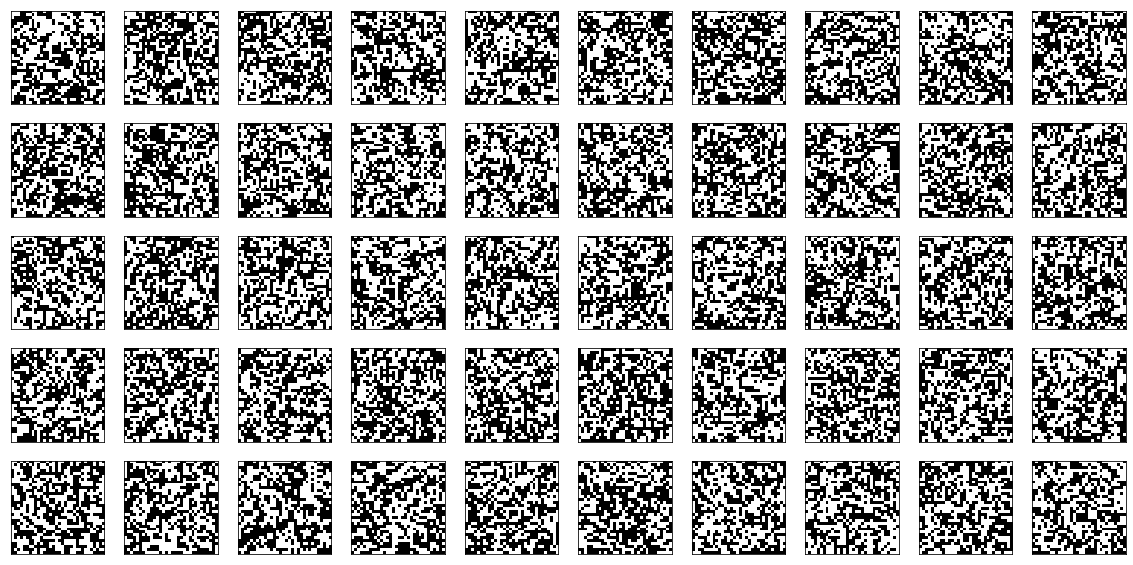

In [56]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_32[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

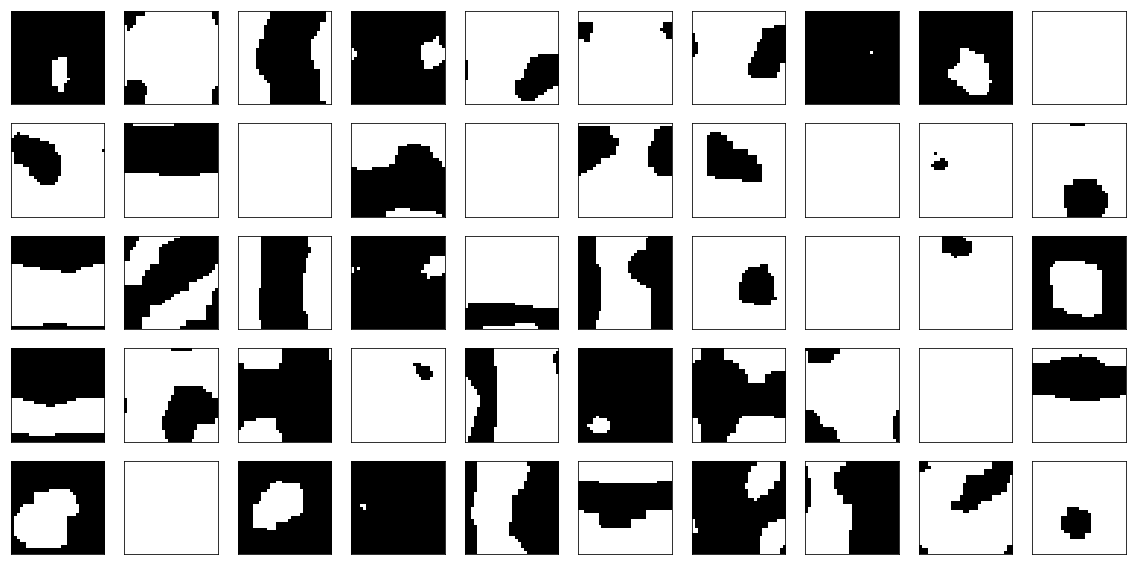

In [57]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_32[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [58]:
#Combine the two data-sets into a single array
data_img_32 = np.concatenate((high_t_32,low_t_32))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_32 = data_img_32.reshape((-1, 32*32))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_32 = np.concatenate((np.ones(len(high_t_32)), np.zeros(len(low_t_32))))

#Randomize the data and labels in the same manner, so that we can easily create train and test sets
data_img_32, data_label_32 = shuffle(data_img_32, data_label_32, random_state = 0)

## Part a: Train a SVM (64x64)

### Determine Best Fitting Parameters

**[Introduction](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)**

In the case of the Ising dataset, the task is to predict, given an image, which phase it is in. We are given samples of the two phases on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC`, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For example : `classifier = svm.SVC(C=1e1,kernel='rbf',gamma=0.003,cache_size=8000,probability=False)` has three important pieces of information: the values for *C*, the *kernel*, and *gamma*.

---



**[Choosing the parameters of the model](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)**

To find good values for these parameters, we can use tools such as grid search and cross validation.

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include `C`, `kernel` and `gamma` for Support Vector Classifier, `alpha` for Lasso, etc.

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

For the purpose of this code, we encourage you to use the `GridSearchCV` functions.  You should run the training using a combination of given parameters, and then take the best combination.

In [40]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
def get_train_test(data_img,data_label,split_id,shuffle_bool=False):
    if shuffle_bool:
        data_img, data_label = shuffle(data_img, data_label)
    train_img = data_img[:split_id]
    test_img = data_img[split_id:]
    train_lbl = data_label[:split_id]
    test_lbl = data_label[split_id:]
    return train_img, test_img, train_lbl, test_lbl

In [12]:
parameters = {'kernel':('rbf','sigmoid','poly'),'C':[1,10,20],'shrinking':[False,True],'gamma':['auto','scale']}
svc = sklearn.svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(data_img_64,data_label_64)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'gamma': ['auto', 'scale'],
                         'kernel': ('rbf', 'sigmoid', 'poly'),
                         'shrinking': [False, True]})

In [17]:
clf.cv_results_

{'mean_fit_time': array([4.31546035, 3.95132675, 4.38087678, 4.53907619]),
 'std_fit_time': array([0.70079015, 0.15312329, 0.36723663, 0.51758017]),
 'mean_score_time': array([0.88574076, 1.34191093, 0.98740869, 1.53103662]),
 'std_score_time': array([0.09134305, 0.07214955, 0.13112772, 0.16644586]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.51 , 0.925, 0.51 , 0.955]),
 'split1_test_score': array([0.535, 0.95 , 0.535, 0.97 ]),
 'split2_test_score': array([0.49 , 0.945, 0.49 , 0.95 ]),
 'split3_test_score': array([0.5 , 0.95, 0.5 , 0.96]),
 'split4_tes

On a first run, it seems linear does really badly. So I did another grid search with rbf and nonlinear kernels only.

In [13]:
clf.cv_results_

{'mean_fit_time': array([2.78896732, 2.68673835, 2.52769694, 2.53183956, 2.82851582,
        2.65197697, 2.58991618, 2.68552618, 2.65068526, 2.69840078,
        2.62843432, 2.59064255, 2.49272094, 2.54841676, 2.42587032,
        2.23755054, 2.43346238, 2.6677309 , 2.82804847, 2.95243955,
        2.35852113, 2.56579719, 2.58737731, 2.687853  , 2.58284206,
        2.41313396, 2.08554673, 2.24941258, 2.74882922, 3.29378262,
        2.75066905, 2.45436802, 2.27510233, 2.22365837, 2.4306891 ,
        2.44487596]),
 'std_fit_time': array([0.10672012, 0.15207003, 0.06619666, 0.06316422, 0.13327055,
        0.11241395, 0.06352316, 0.10371857, 0.20324581, 0.20159246,
        0.06331008, 0.06858209, 0.06307918, 0.06662178, 0.23637555,
        0.09482006, 0.02606727, 0.23239302, 0.12640227, 0.23183211,
        0.12899474, 0.45532561, 0.12970997, 0.24979055, 0.11867655,
        0.00706044, 0.04200564, 0.22249415, 0.17609194, 0.70991768,
        0.26813633, 0.00250795, 0.0585476 , 0.15915775, 0.016

In [19]:
parameters = {'kernel':['rbf'],'C':[20,50,60],'gamma':['scale','auto']}
svc = sklearn.svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(data_img_64,data_label_64)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [20, 50, 60], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

In [20]:
clf.cv_results_

{'mean_fit_time': array([2.6860703 , 2.64960961, 2.6742681 , 2.65543971, 2.66869555,
        2.65786686]),
 'std_fit_time': array([0.06619564, 0.12567171, 0.05591045, 0.09954708, 0.07456139,
        0.12577424]),
 'mean_score_time': array([1.05008206, 1.09421782, 1.08210115, 1.05993619, 1.07597103,
        1.05945754]),
 'std_score_time': array([0.03246994, 0.0926095 , 0.01254897, 0.06213934, 0.04427647,
        0.08440886]),
 'param_C': masked_array(data=[20, 20, 50, 50, 60, 60],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'auto', 'scale', 'auto', 'scale', 'auto'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'p

### Train and Test Model

In [27]:
#TRAIN YOUR FINAL MODEL USING PARAMETERS FROM GRID SEARCH HERE
# The parameters were C:20 (C values did the same between tested 20-60),
# gamma default, kernel rbf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [28]:
data_img_64.shape

(1000, 4096)

In [45]:
samples = 20
scores = []

for i in range(samples):
    train_img, test_img, train_lbl, test_lbl = get_train_test(data_img_64,data_label_64,700,shuffle_bool=True)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=10,kernel='rbf'))
    clf.fit(train_img, train_lbl)
    # Score on 70/30 split is decent. 
    scores.append(clf.score(test_img,test_lbl))

print(f'Average test score was {np.mean(scores)}')

Average test score was 0.951


## Part a: Train a NN (64x64)

**[Introduction](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a)**

Neural networks work far better than other existing methods for classification.  However, determining the right pair of hyperparameters for a neural network can be incredibly difficult.  For the purposes of this homework, try playing around with the following hyperparameters:

* the activation functions used in your hidden layers
* the dropout rate used in your hidden layers
* the number of nodes in your hidden layers

# Trying out a standard dense NN

In [13]:
import tensorflow_addons as tfa
from tensorflow.keras import layers
from keras import backend as K

In [62]:
# Prepare our data to be inputted into a network
n_train = 750
batch_size = 128
num_classes = 2
num_epochs = 10
input_shape = (64,64,1)

img_rows, img_cols = 64, 64

t = time.time()

x_train = data_img_64[:n_train]
y_train = data_label_64[:n_train]

x_test = data_img_64[n_train:]
y_test = data_label_64[n_train:]

# Keras requires inputted data to be in a specific shape.
# This if-statement puts it in the correct format for us.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Because our data is already between 0 and 1, we have no need to rescale it
#(As we would for a color or greyscale image)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_train = np.array([np.where(a==1)[0][0] for a in y_train])
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test = np.array([np.where(a==1)[0][0] for a in y_test])

x_train shape: (750, 64, 64, 1)
750 train samples
250 test samples


# Different architecture: transformer for images

In [21]:
# I've heard transformers are pretty neat
# https://keras.io/examples/vision/image_classification_with_vision_transformer/

In [30]:
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

169009152/169001437 [==============================] - 7s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


In [63]:
learning_rate = 0.001
weight_decay = 0.0001
image_size = 64  # We'll resize input images to this size
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

# Data augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.Resizing(image_size, image_size),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(factor=0.02),
        layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [14]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

Image size: 64 X 64
Patch size: 8 X 8
Patches per image: 64
Elements per patch: 64


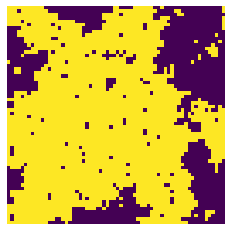

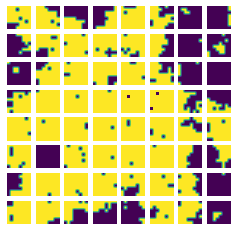

In [65]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 1)) ##########################
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [15]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [68]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "./tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/10
6/6 [==============================] - 39s 4s/step - loss: 3.0665 - accuracy: 0.5382 - top-5-accuracy: 1.0000 - val_loss: 0.2994 - val_accuracy: 0.8933 - val_top-5-accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 22s 4s/step - loss: 1.0770 - accuracy: 0.7177 - top-5-accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9867 - val_top-5-accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 20s 3s/step - loss: 0.2156 - accuracy: 0.9138 - top-5-accuracy: 1.0000 - val_loss: 1.5965e-04 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 20s 3s/step - loss: 0.0498 - accuracy: 0.9827 - top-5-accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9867 - val_top-5-accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 22s 4s/step - loss: 0.0102 - accuracy: 0.9962 - top-5-accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9867 - val_top-5-accuracy: 1.0000
Epoch 6/10
6/6 [====================

10 epochs got 100% on test data.

In [118]:
# with a Sequential model
model = vit_classifier
get_features = K.function([model.layers[0].input],
                                  [model.layers[-1].output])
layer_output_tr = get_features([x_train])[0]

In [96]:
sims = make_sims([2.269],5)

In [107]:
sims = sims.reshape(5,64,64,1)

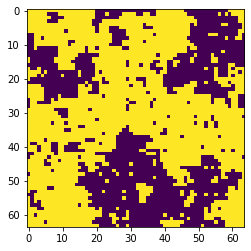

In [113]:
plt.imshow(sims[3,:,:,:])

In [119]:
layer_output_tr

array([[  5.4428415,  -6.256466 ],
       [  7.151498 ,  -6.744347 ],
       [ -2.6022596,   2.6962435],
       ...,
       [  6.8910227,  -8.114566 ],
       [  7.389319 ,  -8.528796 ],
       [ 10.142399 , -10.8175955]], dtype=float32)

In [83]:
x_train.shape

(750, 64, 64, 1)

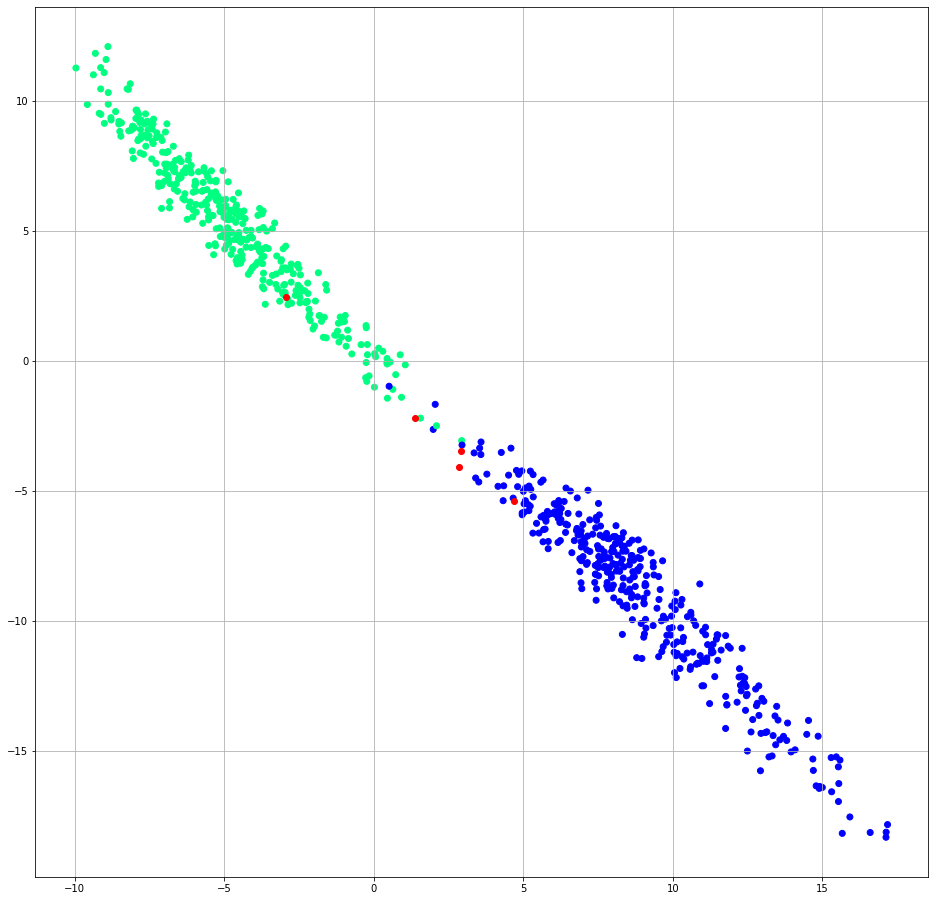

In [130]:
plt.figure(figsize=(16,16))
plt.scatter(layer_output_tr[:,0],layer_output_tr[:,1],c=y_train,cmap='winter')
plt.scatter(layer_output[:,0],layer_output[:,1],c='r')
plt.grid();

In [87]:
layer_output.shape

(750, 2)

## Part b: Find $T_c$

### Ising Functions

In [4]:
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

#### First, I narrowed down the search space by taking large steps. Then I searched in finer and finer steps with more and more samples.

In [3]:
def make_sims(temps,n):
    # Returns array of simulations at temperatures in temp; n samples per temp
    sims = []
    for t in temps:
        print(f'On {t}\t\t',end='\r')
        for i in range(n):
            ising_simu = Ising(32, t)
            sims.append(ising_simu.simulate().flatten())
    return np.array(sims)

In [30]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=10,kernel='rbf'))
clf.fit(data_img_32, data_label_32)
scores = clf.score(data_img_32,data_label_32)
print(scores)

1.0


In [48]:
# Mean predictions for various simulation temperatures
sims = make_sims(np.linspace(.001,5,10),5)
preds = np.mean(clf.predict(sims).reshape(-1,n),axis=1)
for i,pred in enumerate(preds):
    print(f'Temp {np.round(temps[i],2)}: {pred}')

Temp 0.0: 0.0
Temp 0.56: 0.0
Temp 1.11: 0.0
Temp 1.67: 0.0
Temp 2.22: 0.0
Temp 2.78: 1.0
Temp 3.33: 1.0
Temp 3.89: 1.0
Temp 4.44: 1.0
Temp 5.0: 1.0


In [86]:
# Mean predictions for various simulation temperatures
temps = np.linspace(2,3,10)
n=5
sims = make_sims(temps,n)
preds = np.mean(clf.predict(sims).reshape(-1,n),axis=1)
for i,pred in enumerate(preds):
    print(f'Temp {np.round(temps[i],2)}: {pred}')

Temp 2.0: 0.08888889			
Temp 2.11: 0.2
Temp 2.22: 0.4
Temp 2.33: 0.2
Temp 2.44: 0.8
Temp 2.56: 1.0
Temp 2.67: 1.0
Temp 2.78: 1.0
Temp 2.89: 1.0
Temp 3.0: 1.0


My heuristic is that the SVM will have the hardest time classifying images at the critical temperature, leading to a .5 average prediction IF the low and high temperatures were evenly spaced and the classifier interpolates linearly between them.

A binary search makes more sense than this essentially brute force searching.

In [91]:
# Mean predictions for various simulation temperatures
def bin_search_tc(high_t,low_t,n,tol=1e-3,limit=10):
    # Does a binary search for the critical temperature by seeing when simulations reach 
    # within a tolerance of .5. (Resolution depends on n)
    classif = 1
    cycle = 0
    while np.abs(classif-.5) > tol:
        temp = (high_t+low_t)/2
        sims = make_sims([temp],100)
        preds = np.mean(clf.predict(sims))
        if preds > .5:
            high_t = temp
        else:
            low_t = temp
        cycle+=1
        print(cycle)
        if cycle>limit:
            print('Max iteration reached')
            return temp
    return temp

Note: according to the section notebook, the critical temperature should be roughly 2.269.

In [92]:
temp = bin_search_tc(2.44,2.11,100)

1n 2.275		
2n 2.1925		
3n 2.2337499999999997		
4n 2.2543749999999996		
5n 2.2646875		
6n 2.2698437499999997		
7n 2.267265625		
8n 2.2659765624999997		
9n 2.2666210937499995		
10 2.2669433593749995		
11 2.2671044921874994		
Max iteration reached


In [94]:
print(f'Critical temperature found through binary search was {temp}.')

Critical temperature found through binary search was 2.2671044921874994.


I was surprised by how well this worked. SVM was only trained to classify these images. There was nothing to enforce that the algorithm should be most uncertain exactly at the physical quantity $T_c$. I suppose it reflects the nature of the physical system, and that $T_c$ really does mean exactly the boundary of order and disorder, which the SVM learned to distinguish.

## Part c: Find $T_1$ and $T_2$

I think I can use the binary search method with SVM training to identify temperatures.

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [74]:
low_t = data_img_32[data_label_32==0]
high_t = data_img_32[data_label_32==1]

In [ ]:
temps = np.linspace(.6,1.4,10)
sims = make_sims(temps,20)

In [109]:
n = 20
svc = sklearn.svm.SVC()
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=10,kernel='rbf'))
scores = []

for i,t in enumerate(temps):
    training = np.concatenate([low_t,sims[i*n:i*n+n,:]],axis=0)
    labels = np.concatenate([np.zeros(low_t.shape[0]),np.ones(n)])

    clf.fit(training, labels)
    scores.append(np.mean(clf.predict(sims[i*n:i*n+n,:])))

Training score: 0.9942307692307693


In [ ]:
plt.plot(temps,scores)